In [1]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail Data Set.xlsx to Online Retail Data Set.xlsx


In [3]:
import os
os.listdir()

['.config', 'Online Retail Data Set.xlsx', 'sample_data']

In [4]:
df=pd.read_excel("Online Retail Data Set.xlsx")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Remove returns and invalid prices
df = df[(df['Quantity'] >= 1) & (df['UnitPrice'] >= 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.shape


(531283, 9)

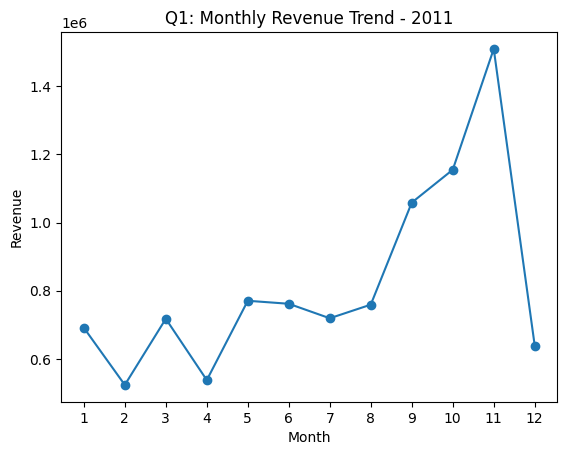

In [7]:
#Monthly Revenue Trend (2011 Only)

import matplotlib.pyplot as plt

# Filter 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

# Group by month
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()

plt.figure()
monthly_revenue.plot(marker='o')
plt.title("Q1: Monthly Revenue Trend - 2011")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(range(1,13))
plt.show()


In [8]:
# Exclude UK
df_no_uk = df[df['Country'] != 'United Kingdom']

# Group by country
country_data = df_no_uk.groupby('Country').agg({
    'Revenue':'sum',
    'Quantity':'sum'
}).sort_values(by='Revenue', ascending=False).head(10)

country_data


,Revenue,Quantity
Country,,
Netherlands,285446.34,200937
EIRE,283453.96,147447
Germany,228867.14,119263
France,209715.11,112104
Australia,138521.31,84209
Spain,61577.11,27951
Switzerland,57089.90,30630
Belgium,41196.34,23237
Sweden,38378.33,36083


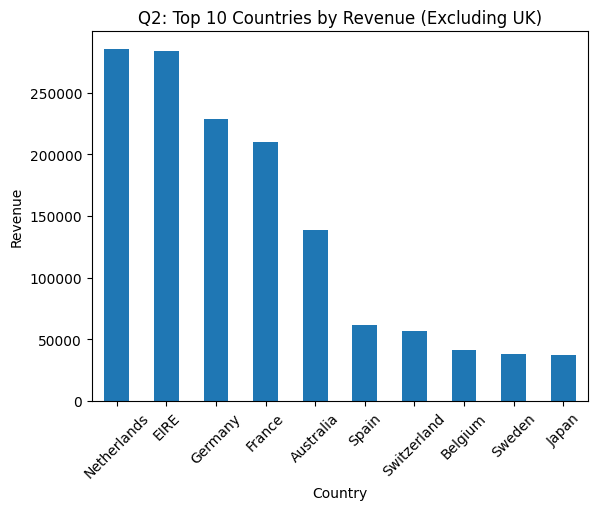

In [9]:
plt.figure()
country_data['Revenue'].plot(kind='bar')
plt.title("Q2: Top 10 Countries by Revenue (Excluding UK)")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Remove missing CustomerID
df_customers = df.dropna(subset=['CustomerID'])

# Group by customer
top_customers = df_customers.groupby('CustomerID')['Revenue'].sum() \
                            .sort_values(ascending=False) \
                            .head(10)

top_customers


,Revenue
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
12415.0,124914.53
14156.0,117379.63
17511.0,91062.38
16029.0,81024.84


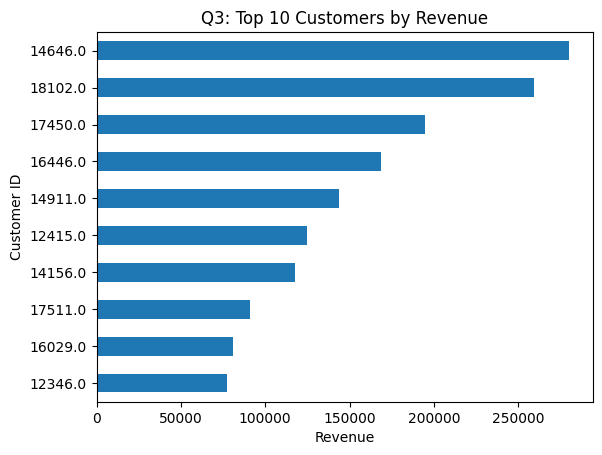

In [11]:
plt.figure()
top_customers.sort_values().plot(kind='barh')
plt.title("Q3: Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.show()


In [12]:
# Exclude UK
df_demand = df[df['Country'] != 'United Kingdom']

country_demand = df_demand.groupby('Country')['Quantity'] \
                           .sum() \
                           .sort_values(ascending=False)

country_demand.head(15)


,Quantity
Country,
Netherlands,200937
EIRE,147447
Germany,119263
France,112104
Australia,84209
Sweden,36083
Switzerland,30630
Spain,27951
Japan,26016


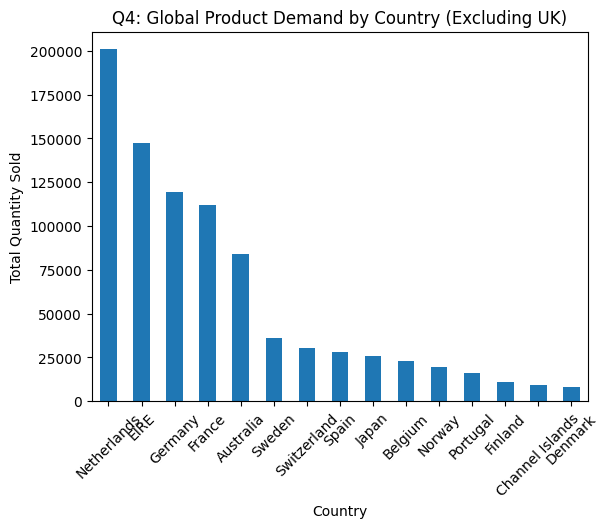

In [13]:
plt.figure()
country_demand.head(15).plot(kind='bar')
plt.title("Q4: Global Product Demand by Country (Excluding UK)")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


In [15]:
df.to_csv("Cleaned_OnlineRetail.csv", index=False)
